In [4]:
import scanpy as sc
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [16]:
data = np.load("test_data.npy").astype(np.float32)
print(f"data shape: {data.shape}")

data shape: (350607, 768)


In [6]:
#subsampling
n_samples = 100000
if n_samples < data.shape[0]:
    idx = np.random.choice(data.shape[0], n_samples, replace=False)
    data = data[idx]
print(f"Subsampled data shape: {data.shape}")

Subsampled data shape: (100000, 768)


In [7]:
adata=sc.AnnData(data)

In [8]:
scaler = StandardScaler(copy=False)
adata.X = scaler.fit_transform(adata.X).astype(np.float32)

In [17]:
n_pcs = 50  
sc.tl.pca(adata, n_comps=n_pcs, dtype=np.float32)

computing PCA
    with n_comps=50
    finished (0:00:07)


In [10]:
sc.pp.neighbors(
    adata,
    n_neighbors=50,
    n_pcs=n_pcs,
    use_rep='X_pca',
    random_state=42
)

Computing neighbors...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:51)


In [11]:
resolutions = [0.6, 1.6]  
for res in resolutions:
    print(f"Running Leiden clustering with resolution {res}...")
    sc.tl.leiden(
        adata,
        resolution=res,
        key_added=f'leiden_res{res}',
        use_weights=False
    )

Running Leiden clustering with resolution 0.6...
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_res0.6', the cluster labels (adata.obs, categorical) (0:00:58)
Running Leiden clustering with resolution 1.6...
running Leiden clustering
    finished: found 29 clusters and added
    'leiden_res1.6', the cluster labels (adata.obs, categorical) (0:00:55)


In [ ]:
print("Computing tSNE...")
sc.tl.tsne(
    adata,
    n_pcs=n_pcs,
    learning_rate=200,
    random_state=42
)

Computing tSNE...
computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE


/root/anaconda3/envs/deepst_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:07:40)


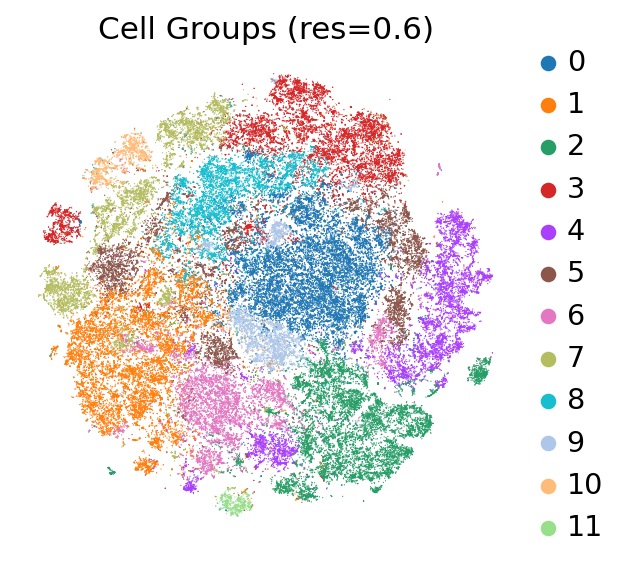

In [ ]:
sc.pl.tsne(adata, color='leiden_res0.6', title='Cell Groups (res=0.6)')

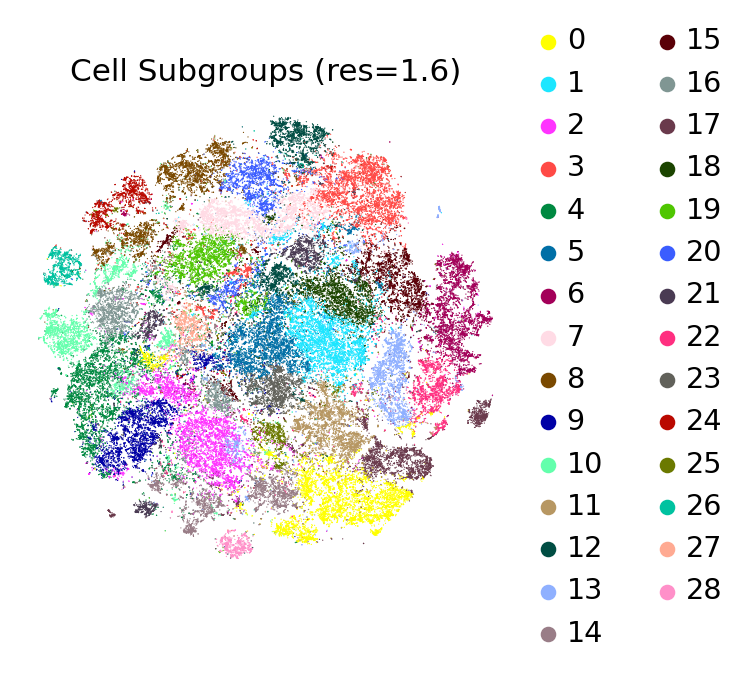

In [ ]:
sc.pl.tsne(adata, color='leiden_res1.6', title='Cell Subgroups (res=1.6)')